In [2]:
import zipfile
import os
from PIL import Image
from io import BytesIO
from IPython.display import display

In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/Alphabets-P.zip', 'r') as zip_ref:
  files=zip_ref.namelist()
  folder_list = []
  for filename in files:
      if filename.endswith('/'):
          folder_list.append(filename)
  num_items=len(folder_list)
  print(f'zipfile contains {num_items} items')


zipfile contains 58 items


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Specify the path to the ZIP file
zip_file_path = '/content/drive/MyDrive/Alphabets-P.zip'

# Define a set of image file extensions
image_ex = {'.jpg', '.jpeg', '.png'}

# Create a dictionary to keep the count of images in each folder
image_count = {}

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file names in the ZIP file
    file_list = zip_ref.namelist()

    # Iterate over the file list
    for file in file_list:
        # Split the filename to get the folder (if any) and the file name
        folder, filename = os.path.split(file)

        # Check if the file is an image by its extension
        if os.path.splitext(filename)[1].lower() in image_ex:
            if folder not in image_count:
                image_count[folder] = 0
            image_count[folder] += 1

# Print the count of images in each folder
for folder, count in image_count.items():
    print(f'Folder "{folder}" contains {count} images.')

Folder "Alphabets/A" contains 98 images.
Folder "Alphabets/aa" contains 89 images.
Folder "Alphabets/B" contains 51 images.
Folder "Alphabets/bb" contains 87 images.
Folder "Alphabets/C" contains 78 images.
Folder "Alphabets/cc" contains 94 images.
Folder "Alphabets/D" contains 93 images.
Folder "Alphabets/dd" contains 100 images.
Folder "Alphabets/E" contains 101 images.
Folder "Alphabets/ee" contains 83 images.
Folder "Alphabets/F" contains 100 images.
Folder "Alphabets/ff" contains 98 images.
Folder "Alphabets/G" contains 100 images.
Folder "Alphabets/gg" contains 97 images.
Folder "Alphabets/H" contains 100 images.
Folder "Alphabets/hh" contains 100 images.
Folder "Alphabets/I" contains 104 images.
Folder "Alphabets/ii" contains 101 images.
Folder "Alphabets/J" contains 100 images.
Folder "Alphabets/jj" contains 100 images.
Folder "Alphabets/K" contains 100 images.
Folder "Alphabets/kk" contains 100 images.
Folder "Alphabets/L" contains 99 images.
Folder "Alphabets/ll" contains 100

In [6]:
import random
# List to store image files
image_files = []

# Open the ZIP file
with zipfile.ZipFile('/content/drive/MyDrive/Alphabets-P.zip', 'r') as zip_ref:
    # Iterate over the file list
    for file in zip_ref.namelist():
        # Check if the file is an image by its extension
        if os.path.splitext(file)[1].lower() in image_ex:
            image_files.append(file)

    # Handle the case where no image files are found
    if not image_files:
        print("No image files found in the ZIP file.")
    else:
        # Select a random image file
        random_image_file = random.choice(image_files)

        # Get the folder name of the random image file
        folder_name = os.path.dirname(random_image_file.strip('/')).split('/')[-1]

        # Print the last letter of the folder name
        if folder_name:
            print(f'The given image is : {folder_name[-1]}')
        else:
            print('The image is not inside any folder.')

        # Read the random image file
        with zip_ref.open(random_image_file) as image_data:
            image = Image.open(BytesIO(image_data.read()))

            # Display the image (will work in environments that support image display)
            display(image)

            # Save the image if needed
            # image.save('random_image.jpg')

            print(f'The random image selected is: {random_image_file}')


Output hidden; open in https://colab.research.google.com to view.

In [7]:
#import zipfile
#import os

'''Extract the ZIP file
with zipfile.ZipFile('/content/drive/MyDrive/Alphabets-P.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_data')
'''

"Extract the ZIP file\nwith zipfile.ZipFile('/content/drive/MyDrive/Alphabets-P.zip', 'r') as zip_ref:\n    zip_ref.extractall('extracted_data')\n"

In [8]:
import os
import zipfile
from sklearn.model_selection import train_test_split
import shutil

# Define the paths
zip_file_path = '/content/drive/MyDrive/Alphabets-P.zip'
extracted_dir = '/content/extracted_data'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Create main directories for train, validation, and test sets
train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List of accepted image extensions
image_ext = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']

# Get list of letters (folders within the alphabet folder)
alphabet_dir = os.path.join(extracted_dir, 'Alphabets')
letters = os.listdir(alphabet_dir)

for letter in letters:
    letter_path = os.path.join(alphabet_dir, letter)
    if os.path.isdir(letter_path):
        images = os.listdir(letter_path)
        images = [img for img in images if os.path.splitext(img)[1].lower() in image_ext]  # Filter images

        # Check if there are any images before splitting
        if len(images) > 0:
            # Split the images into train, validation, and test sets (80% train, 10% val, 10% test)
            train_images, temp_images = train_test_split(images, test_size=0.2, random_state=42)
            val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

            # Create letter-specific directories in train, val, and test folders
            os.makedirs(os.path.join(train_dir, letter), exist_ok=True)
            os.makedirs(os.path.join(val_dir, letter), exist_ok=True)
            os.makedirs(os.path.join(test_dir, letter), exist_ok=True)

            # Copy images to respective directories
            for image in train_images:
                shutil.copy(os.path.join(letter_path, image), os.path.join(train_dir, letter, image))
            for image in val_images:
                shutil.copy(os.path.join(letter_path, image), os.path.join(val_dir, letter, image))
            for image in test_images:
                shutil.copy(os.path.join(letter_path, image), os.path.join(test_dir, letter, image))

print("Dataset organized and split into train, validation, and test sets successfully!")


Dataset organized and split into train, validation, and test sets successfully!


In [9]:
train_images

['IMG20250205232614.jpg',
 'IMG20250205232620.jpg',
 'IMG20250205232530.jpg',
 'IMG20250205232444.jpg',
 'IMG20250205232408.jpg',
 'IMG20250205232507.jpg',
 'IMG20250205232616.jpg',
 'IMG_20250206_131948.jpg',
 'IMG20250205232505.jpg',
 'IMG20250205232547.jpg',
 'IMG20250205232532.jpg',
 'IMG20250205232431.jpg',
 'IMG20250205232416.jpg',
 'IMG20250205232632.jpg',
 'IMG20250205232557.jpg',
 'IMG20250205232642.jpg',
 'IMG20250205232536.jpg',
 'IMG20250205232607.jpg',
 'IMG20250205232528.jpg',
 'IMG20250205232521.jpg',
 'IMG20250205232605.jpg',
 'IMG20250205232638.jpg',
 'IMG20250205232449.jpg',
 'IMG20250205232503.jpg',
 'IMG20250205232619.jpg',
 'IMG20250205232534.jpg',
 'IMG20250205232453.jpg',
 'IMG20250205232545.jpg',
 'IMG20250205232542.jpg',
 'IMG20250205232517.jpg',
 'IMG20250205232641.jpg',
 'IMG20250205232349.jpg',
 'IMG_20250206_132005.jpg',
 'IMG20250205232515.jpg',
 'IMG20250205232556.jpg',
 'IMG20250205232502.jpg',
 'IMG20250205232626.jpg',
 'IMG20250205232429.jpg',
 'IMG202

In [10]:
test_images

['IMG_20250206_131954.jpg',
 'IMG20250205232639.jpg',
 'IMG20250205232552.jpg',
 'IMG_20250206_132042.jpg',
 'IMG20250205232432.jpg',
 'IMG20250205232427.jpg',
 'IMG20250205232424.jpg',
 'IMG20250205232554.jpg']

In [11]:
val_images

['IMG20250205232617.jpg',
 'IMG20250205232451.jpg',
 'IMG20250205232443.jpg',
 'IMG20250205232636.jpg',
 'IMG20250205232543.jpg',
 'IMG_20250206_132020.jpg',
 'IMG20250205232520.jpg']

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models


In [13]:
datagen=ImageDataGenerator(rescale=1./255)

In [14]:
train_gen=datagen.flow_from_directory('/content/data/train',target_size=(64,64),batch_size=32,class_mode='categorical')


Found 3887 images belonging to 52 classes.


In [15]:
test_gen=datagen.flow_from_directory('/content/data/test',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 505 images belonging to 52 classes.


In [16]:
val_gen=datagen.flow_from_directory('/content/data/val',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 486 images belonging to 52 classes.


In [17]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_gen.class_indices), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model
tr=model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=10,
    validation_data=val_gen,
    validation_steps=val_gen.samples // val_gen.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.1522 - loss: 3.3723 - val_accuracy: 0.7000 - val_loss: 1.0747
Epoch 2/10
  1/121 ━━━━━━━━━━━━━━━━━━━━ 29s 250ms/step - accuracy: 0.7812 - loss: 0.7378

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.7812 - loss: 0.7378 - val_accuracy: 0.6854 - val_loss: 1.0858
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8068 - loss: 0.6989 - val_accuracy: 0.8875 - val_loss: 0.4613
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.8125 - loss: 0.4430 - val_accuracy: 0.8875 - val_loss: 0.4593
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 168s 998ms/step - accuracy: 0.9325 - loss: 0.2617 - val_accuracy: 0.9229 - val_loss: 0.3634
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.9062 - loss: 0.5619 - val_accuracy: 0.9167 - val_loss: 0.3648
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9563 - loss: 0.1398 - val_accuracy: 0.9208 - val_loss: 0.4098
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.8750 - loss: 0.4074 - val_accuracy: 0.9229 - val_loss: 0.4028
Epoch 9/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9758 - loss: 0.0826 - val_accurac

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_gen, verbose=2)
print(f'\nTest accuracy: {test_acc}')

16/16 - 20s - 1s/step - accuracy: 0.9267 - loss: 0.2350

Test accuracy: 0.9267326593399048


In [21]:
model.predict(val_gen)

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 747ms/step


array([[8.5630300e-06, 4.2199994e-05, 2.9750996e-08, ..., 4.1378228e-04,
        9.4073899e-03, 9.9193683e-05],
       [2.6420420e-11, 1.6098427e-09, 1.9476414e-10, ..., 9.9315143e-01,
        2.9040402e-04, 9.4587335e-08],
       [1.1793679e-06, 1.5171747e-06, 4.4240639e-11, ..., 7.1177196e-11,
        2.0016451e-08, 3.3043288e-09],
       ...,
       [1.6383619e-09, 1.5194789e-14, 4.7814565e-25, ..., 2.2662177e-35,
        2.2784243e-26, 1.5397705e-21],
       [1.2536392e-05, 3.4877501e-02, 4.9276947e-04, ..., 1.2160392e-14,
        1.1138699e-06, 5.8484015e-06],
       [2.4747681e-08, 8.8376506e-09, 5.2264150e-13, ..., 1.0117563e-12,
        7.8855811e-09, 6.2997624e-10]], dtype=float32)

In [22]:
val_loss,val_acc=model.evaluate(val_gen,verbose=2)
print(f'\nVal accurancy:{val_acc}')

16/16 - 12s - 741ms/step - accuracy: 0.9342 - loss: 0.2768

Val accurancy:0.9341563582420349


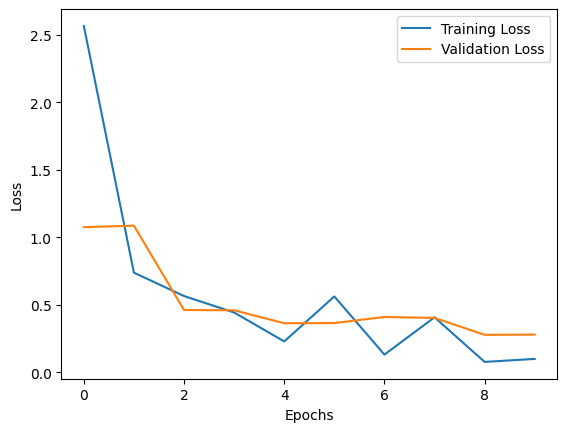

In [23]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(tr.history['loss'], label='Training Loss')
plt.plot(tr.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


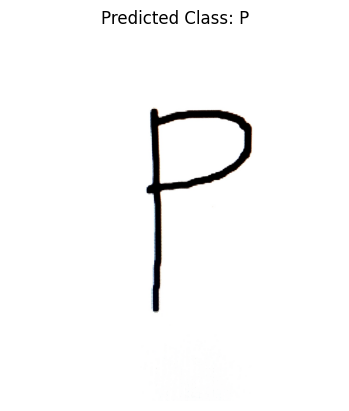

Random Image: extracted_data/Alphabets/P/IMG_20250205_124715.jpg
Predicted Class: P


In [41]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Extract the ZIP file (if not already extracted)
zip_file_path = 'path_to_your_zipfile.zip'  # Replace with the path to your ZIP file
extracted_dir = 'extracted_data'

if not os.path.exists(extracted_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Resize image to the same size as training data
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize
    return img_array

# Predict the class of the image
def predict_image_class(model, img_path, class_indices):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}
    return class_labels[predicted_class]

# Select a random image, predict its class, and print the output
def predict_random_image(model, directory, class_indices):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for filename in files:
            img_path = os.path.join(root, filename)
            if os.path.isfile(img_path):
                image_files.append(img_path)

    # Randomly select an image
    random_img_path = random.choice(image_files)
    predicted_class = predict_image_class(model, random_img_path, class_indices)

    # Display the image and predicted class
    img = image.load_img(random_img_path)
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    print(f"Random Image: {random_img_path}")
    print(f"Predicted Class: {predicted_class}")

# Example usage
directory_path = extracted_dir  # Path to the extracted data directory
predict_random_image(model, directory_path, train_gen.class_indices)
